This notebook analyzes the output files produced by the other notebook.  So, there are no larcv files here, etc, just plots made from the analysis output.

In [1]:
import numpy
from matplotlib import pyplot as plt
import glob
import os
import pandas

%matplotlib inline

Define a list of files to use as input, as well as unified colors and labeling schemes:

In [3]:
folder = "/Users/corey.adams/data/cosmic_tagging_downsample/"
files = folder + "*.npy"
files =glob.glob(files)
print(files)

['/Users/corey.adams/data/cosmic_tagging_downsample/cosmic_tagging_downsample_test_sparse_output_baseline_fullbalance_2.npy', '/Users/corey.adams/data/cosmic_tagging_downsample/cosmic_tagging_downsample_test_sparse_output_baseline.npy', '/Users/corey.adams/data/cosmic_tagging_downsample/cosmic_tagging_downsample_test_sparse_output_biggerbatch.npy']


In [4]:
print()

In [5]:
# open a file and read the ndarray:
data = { os.path.basename(_f).replace("cosmic_tagging_downsample_test_sparse_output_", "").replace(".npy", "") :  numpy.load(_f) for _f in files }

In [7]:
data.keys()

dict_keys(['baseline_fullbalance_2', 'baseline', 'biggerbatch'])

In [8]:
numpy.unique(data['biggerbatch']['neut'], return_counts=True)

(array([0, 1, 2], dtype=uint32), array([2322, 2379, 2299]))

In [9]:
def convert_nd_array_to_flat_array(input_array):
    flat_dtypes = numpy.dtype([
        ('entry'      , numpy.uint32),
        ('neut'       , numpy.uint32),
        ('n_neut_true', numpy.uint32),
        ('n_neut_true', numpy.uint32)
        ('n_neut_true', numpy.uint32,  3),
        ('n_neut_true', numpy.uint32,  3),
        ('n_neut_pred', numpy.uint32,  3),
        ('neut_x_mean', numpy.float32, 3),
        ('neut_y_mean', numpy.float32, 3),
        ('neut_x_std' , numpy.float32, 3),
        ('neut_y_std' , numpy.float32, 3),
        ('accuracy'   , numpy.float32, 3),
        ('acc_neut'   , numpy.float32, 3),
        ('acc_cosm'   , numpy.float32, 3),
        ('iou_neut'   , numpy.float32, 3),
        ('iou_cosm'   , numpy.float32, 3),
        ('acc_non0'   , numpy.float32, 3),
        ('energy'     , numpy.float32),
    ])

143

In [11]:
# data['baseline'].dtype.names
a = flatten_dtype(data['baseline'])

[('entry', '<u4'), ('neut', '<u4'), ('n_neut_true', '<u4', (3,)), ('n_neut_pred', '<u4', (3,)), ('neut_x_mean', '<f4', (3,)), ('neut_y_mean', '<f4', (3,)), ('neut_x_std', '<f4', (3,)), ('neut_y_std', '<f4', (3,)), ('accuracy', '<f4', (3,)), ('acc_neut', '<f4', (3,)), ('acc_cosm', '<f4', (3,)), ('iou_neut', '<f4', (3,)), ('iou_cosm', '<f4', (3,)), ('acc_non0', '<f4', (3,)), ('energy', '<f4')]
entry
uint32
()
0
neut
uint32
()
0
n_neut_true
('<u4', (3,))
(3,)
1
n_neut_pred
('<u4', (3,))
(3,)
1
neut_x_mean
('<f4', (3,))
(3,)
1
neut_y_mean
('<f4', (3,))
(3,)
1
neut_x_std
('<f4', (3,))
(3,)
1
neut_y_std
('<f4', (3,))
(3,)
1
accuracy
('<f4', (3,))
(3,)
1
acc_neut
('<f4', (3,))
(3,)
1
acc_cosm
('<f4', (3,))
(3,)
1
iou_neut
('<f4', (3,))
(3,)
1
iou_cosm
('<f4', (3,))
(3,)
1
acc_non0
('<f4', (3,))
(3,)
1
energy
float32
()
0
[dtype('uint32'), dtype('uint32'), ('n_neut_true_0', <class 'numpy.void'>), ('n_neut_true_1', <class 'numpy.void'>), ('n_neut_true_2', <class 'numpy.void'>), ('n_neut_pred_0'

In [205]:
a.type

numpy.void

In [199]:
help(a)

Help on dtype object:

class dtype(builtins.object)
 |  dtype(obj, align=False, copy=False)
 |  
 |  Create a data type object.
 |  
 |  A numpy array is homogeneous, and contains elements described by a
 |  dtype object. A dtype object can be constructed from different
 |  combinations of fundamental numeric types.
 |  
 |  Parameters
 |  ----------
 |  obj
 |      Object to be converted to a data type object.
 |  align : bool, optional
 |      Add padding to the fields to match what a C compiler would output
 |      for a similar C-struct. Can be ``True`` only if `obj` is a dictionary
 |      or a comma-separated string. If a struct dtype is being created,
 |      this also sets a sticky alignment flag ``isalignedstruct``.
 |  copy : bool, optional
 |      Make a new copy of the data-type object. If ``False``, the result
 |      may just be a reference to a built-in data-type object.
 |  
 |  See also
 |  --------
 |  result_type
 |  
 |  Examples
 |  --------
 |  Using array-scalar 

In [112]:
df = pandas.DataFrame(columns= [
    "NeutrinoIoU_0", "NeutrinoIoU_1", "NeutrinoIoU_2", "NeutrinoIoU",
    "CosmicIoU_0", "CosmicIoU_1", "CosmicIoU_2", "CosmicIoU",
    "AccuracyNonZero_0", "AccuracyNonZero_1", "AccuracyNonZero_2", "AccuracyNonZero",
])

In [113]:
data['baseline'].dtype

dtype([('entry', '<u4'), ('neut', '<u4'), ('n_neut_true', '<u4', (3,)), ('n_neut_pred', '<u4', (3,)), ('neut_x_mean', '<f4', (3,)), ('neut_y_mean', '<f4', (3,)), ('neut_x_std', '<f4', (3,)), ('neut_y_std', '<f4', (3,)), ('accuracy', '<f4', (3,)), ('acc_neut', '<f4', (3,)), ('acc_cosm', '<f4', (3,)), ('iou_neut', '<f4', (3,)), ('iou_cosm', '<f4', (3,)), ('acc_non0', '<f4', (3,)), ('energy', '<f4')])

Compute average accuracy and IoU for each type

In [16]:
for key in data.keys():
    print(key)
#     df[key]['neutrino_iou'] = numpy.mean(data[key]['iou_neut'])
#     print(df.info)
    # compute the mean metrics for several variables:
    print("Non-zero Accuracy: ")
    for i in [0,1,2]:
#         print(f"  Plane {i}: ", numpy.mean(data))
        print(f"Plane {i}")
        print("  Average accuracy for neutrinos is {:.3}".format(numpy.mean(data_nue[key]['acc_non0'][:,i])))
        print("  Average iou for neutrinos is {:.3}".format(numpy.mean(data_nue[key]['iou_neut'][:,i])))


#     print "  Average accuracy for {0} is {1:.2}".format(name, numpy.mean(data['n_acc_{0}'.format(i)])) 

baseline_fullbalance_2
Non-zero Accuracy: 
Plane 0
  Average accuracy for neutrinos is 0.963
  Average iou for neutrinos is 0.426
Plane 1
  Average accuracy for neutrinos is 0.964
  Average iou for neutrinos is 0.436
Plane 2
  Average accuracy for neutrinos is 0.961
  Average iou for neutrinos is 0.502
baseline
Non-zero Accuracy: 
Plane 0
  Average accuracy for neutrinos is 0.945
  Average iou for neutrinos is 0.664
Plane 1
  Average accuracy for neutrinos is 0.944
  Average iou for neutrinos is 0.671
Plane 2
  Average accuracy for neutrinos is 0.945
  Average iou for neutrinos is 0.717
biggerbatch
Non-zero Accuracy: 
Plane 0
  Average accuracy for neutrinos is 0.96
  Average iou for neutrinos is 0.724
Plane 1
  Average accuracy for neutrinos is 0.961
  Average iou for neutrinos is 0.733
Plane 2
  Average accuracy for neutrinos is 0.955
  Average iou for neutrinos is 0.752


In [116]:
df

,baseline,biggerbatch


Distributions of pixel counts for each type:

In [99]:
def plot_neutrino_pixel_count(_data_arr, plane):
    
    bin_step = 5
    end_bin = 500
    bins = numpy.arange(0,end_bin + 0.1,bin_step)
    
    figure = plt.figure(figsize=(16,9))
    for name in _data_arr.keys():
#         if name =='cosmics': continue
        N_neutrino_pixels = _data_arr[name][0:nentries]['n_pix_pred_{0}'.format(plane)]
        values, bin_edges = numpy.histogram(N_neutrino_pixels, bins=bins)
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        
        bin_centers = numpy.insert(bin_centers,0,-bin_step)
        values = numpy.insert(values,0,0)
        bin_centers = numpy.append(bin_centers,bin_centers[-1] + bin_step)
        values = numpy.append(values,-10.0)
        plt.plot(bin_centers, values, label=labels[name],
                 ls='steps-mid',
                 lw=2)
        
    ylims = plt.ylim()
    xlims = plt.xlim()
    plt.ylim(0, ylims[1])
    plt.xlim(0, end_bin)
    plt.title("Plane {0}".format(plane),fontsize=25)
    plt.xlabel("Neutrino Predicted Pixel Count", fontsize=25)
    plt.legend(fontsize=25)
    plt.grid(True)
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_size(14)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_fontsize(0)
    
    plt.show()
    

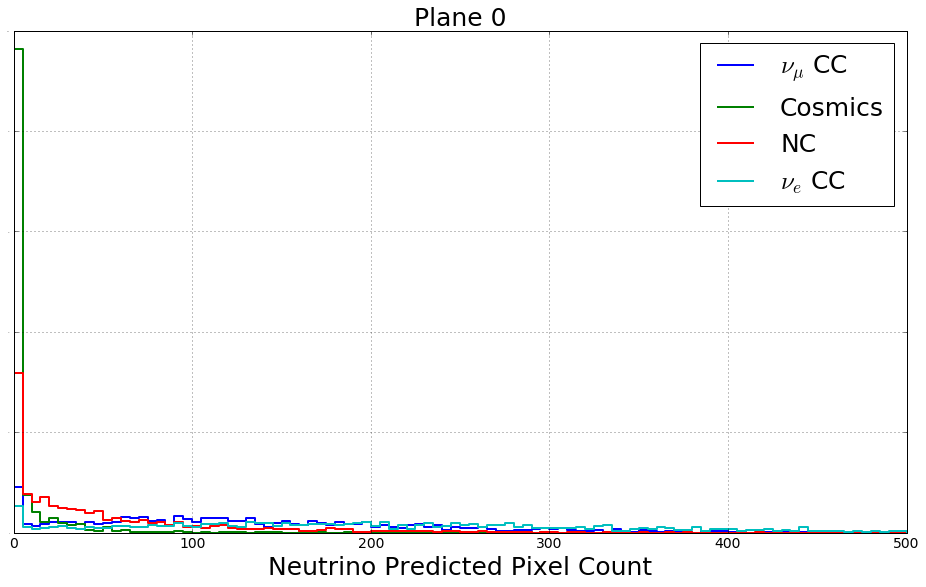

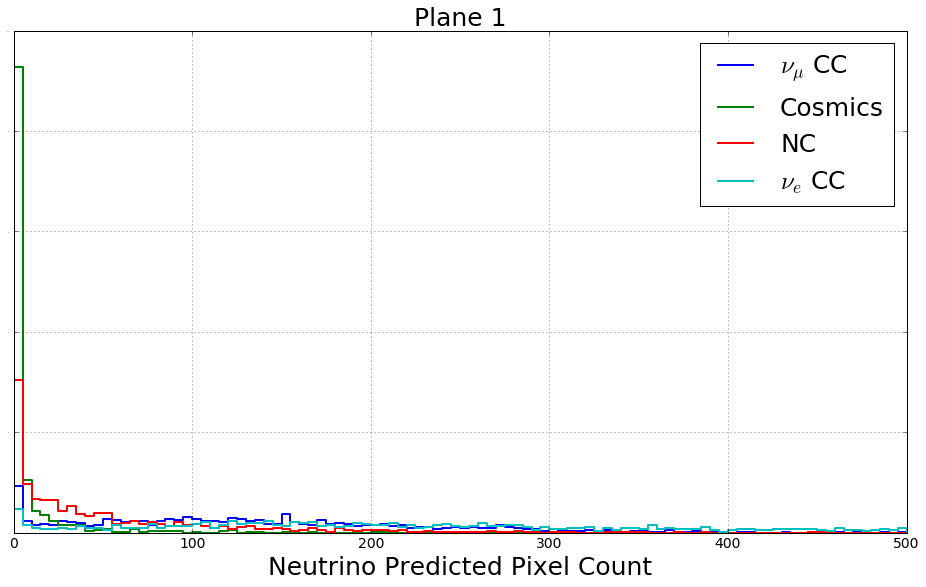

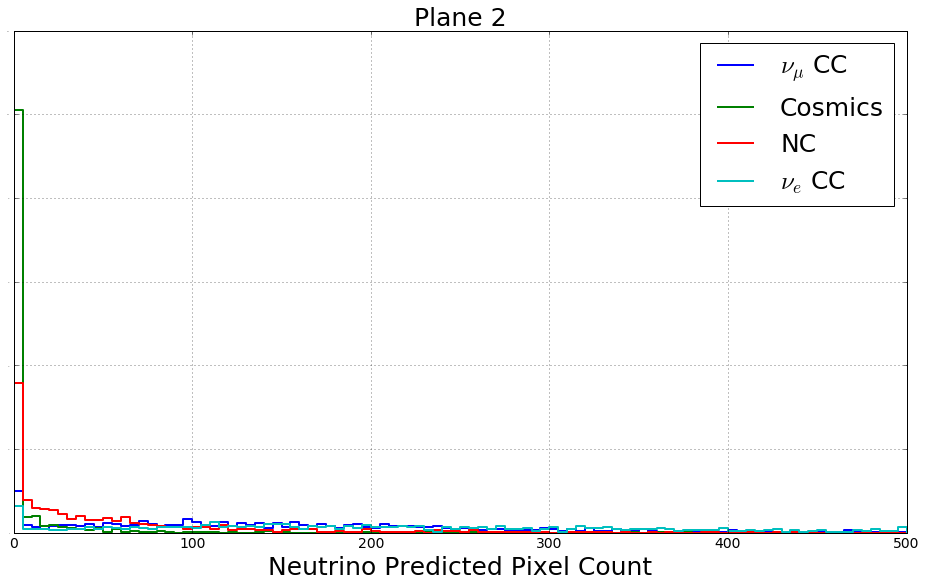

In [100]:
for plane in [0,1,2]:
    plot_neutrino_pixel_count(data_arrs,plane)

## Neutrino Energy and ADC Sums

Plot the Energy and Neutrino ADCs for each type:

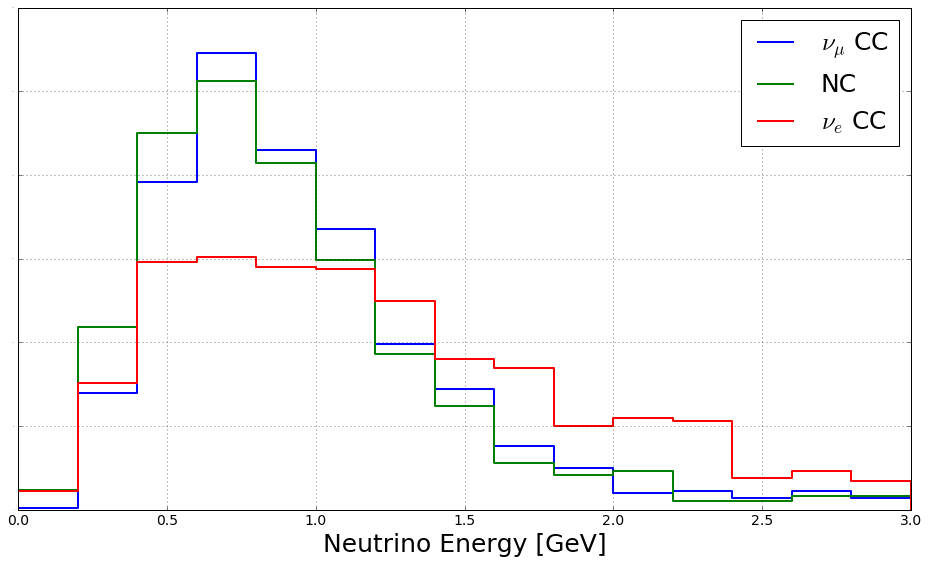

In [7]:
# Neutrino Energy
nu_energy_bin_step = 0.200
nu_energy_end_bin = 3.0
nu_energy_bins = numpy.arange(0,nu_energy_end_bin + 0.1,nu_energy_bin_step)

figure = plt.figure(figsize=(16,9))
for name in data_arrs.keys():
    if name =='cosmics': continue
    neutrino_energy = data_arrs[name][0:nentries]['energy']
    values, bin_edges = numpy.histogram(neutrino_energy, bins=nu_energy_bins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

    bin_centers = numpy.insert(bin_centers,0,-10)
    values = numpy.insert(values,0,0)
    bin_centers = numpy.append(bin_centers,bin_centers[-1] + nu_energy_bin_step)
    values = numpy.append(values,-10.0)
    plt.plot(bin_centers, values, label=labels[name],
             ls='steps-mid',
             lw=2)
    
ylims = plt.ylim()
xlims = plt.xlim()
plt.ylim(0, ylims[1])
plt.xlim(0, nu_energy_end_bin)
plt.xlabel("Neutrino Energy [GeV]", fontsize=25)
plt.legend(fontsize=25)
plt.grid(True)

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_size(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(0)
plt.show()


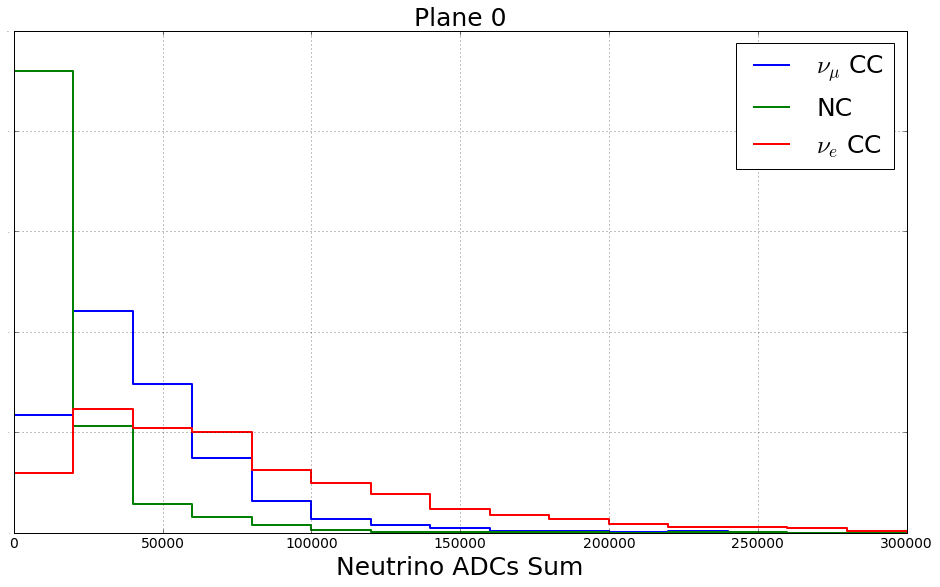

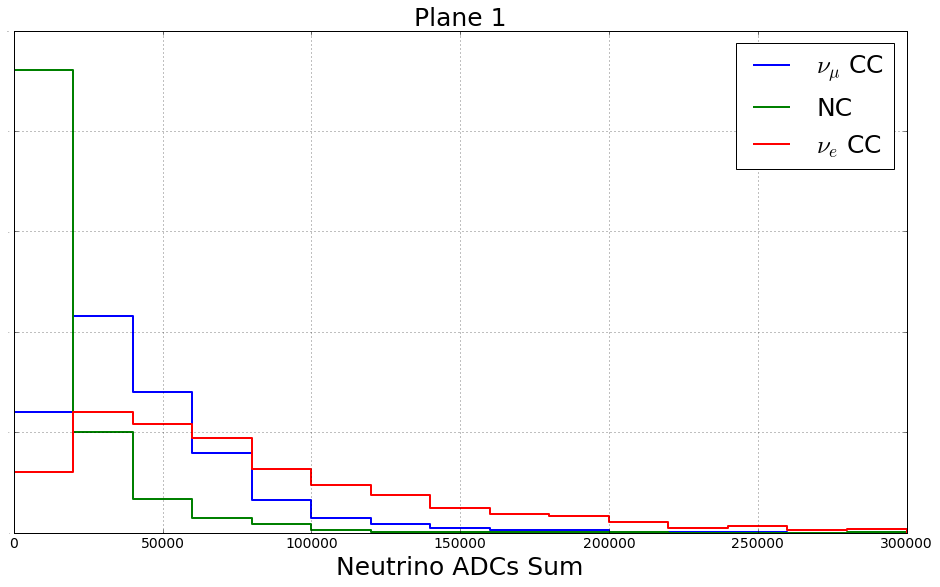

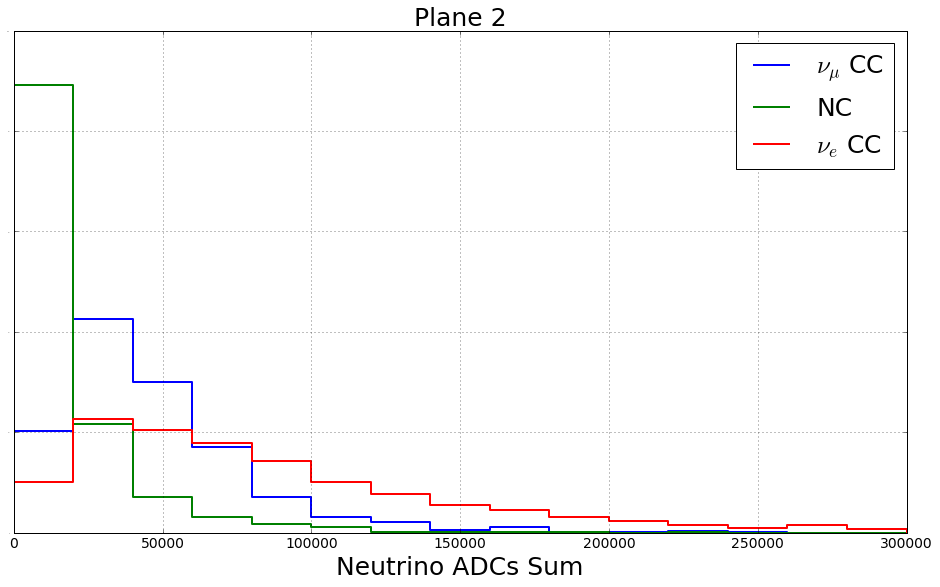

In [8]:
adc_dep_bin_step = 20000.0
adc_dep_end_bin = 300000.0
adc_dep_bins = numpy.arange(0,adc_dep_end_bin + 0.1,adc_dep_bin_step)

for plane in [0,1,2]:
    figure = plt.figure(figsize=(16,9))
    for name in data_arrs.keys():
        if name =='cosmics': continue
        dep_e_adc = data_arrs[name][0:nentries]['n_sum_{0}'.format(plane)]
        values, bin_edges = numpy.histogram(dep_e_adc, bins=adc_dep_bins)
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        
        bin_centers = numpy.insert(bin_centers,0,-adc_dep_bin_step)
        values = numpy.insert(values,0,0)
        bin_centers = numpy.append(bin_centers,bin_centers[-1] + adc_dep_bin_step)
        values = numpy.append(values,-10)
        plt.plot(bin_centers, values, label=labels[name],
                 ls='steps-mid',
                 lw=2)
    ylims = plt.ylim()
    xlims = plt.xlim()
    plt.ylim(0, ylims[1])
    plt.xlim(0, adc_dep_end_bin)
    plt.title("Plane {0}".format(plane),fontsize=25)
    plt.xlabel("Neutrino ADCs Sum", fontsize=25)
    plt.legend(fontsize=25)
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_size(14)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_fontsize(0)
    
    plt.grid(True)
    plt.show()
    

### Correlation between energy and deposited ADC

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


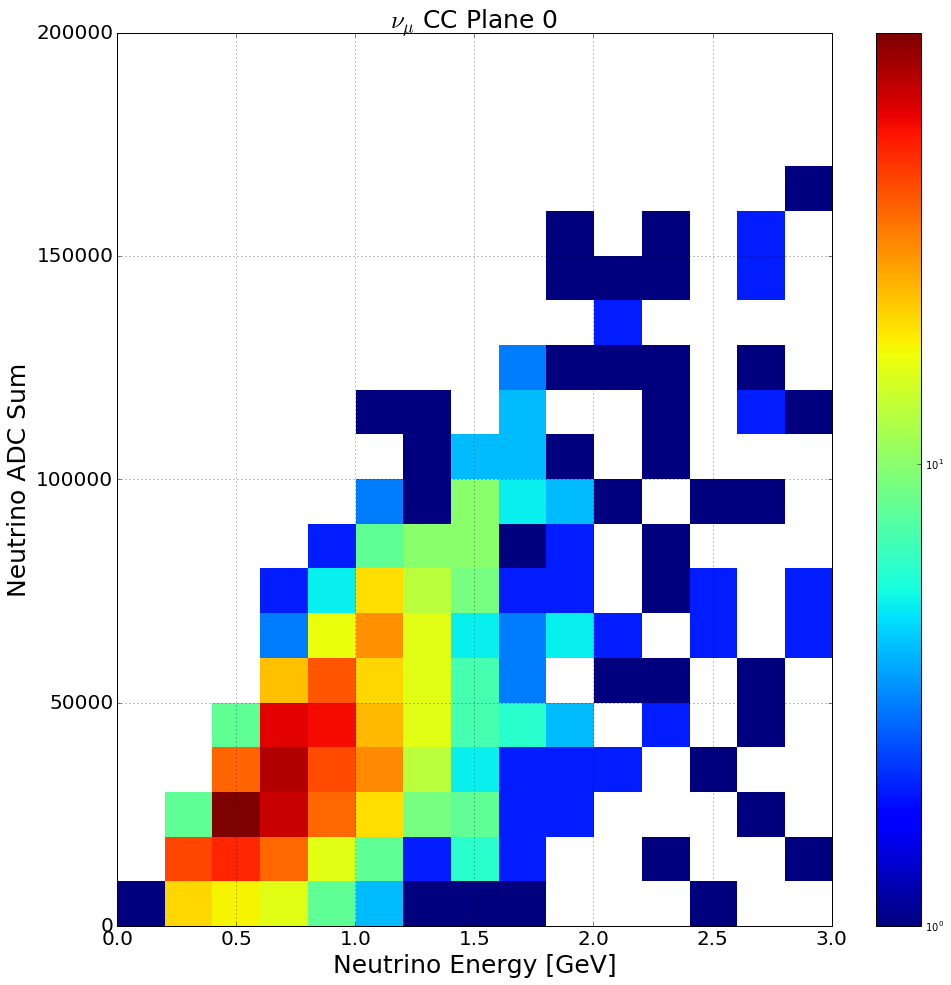

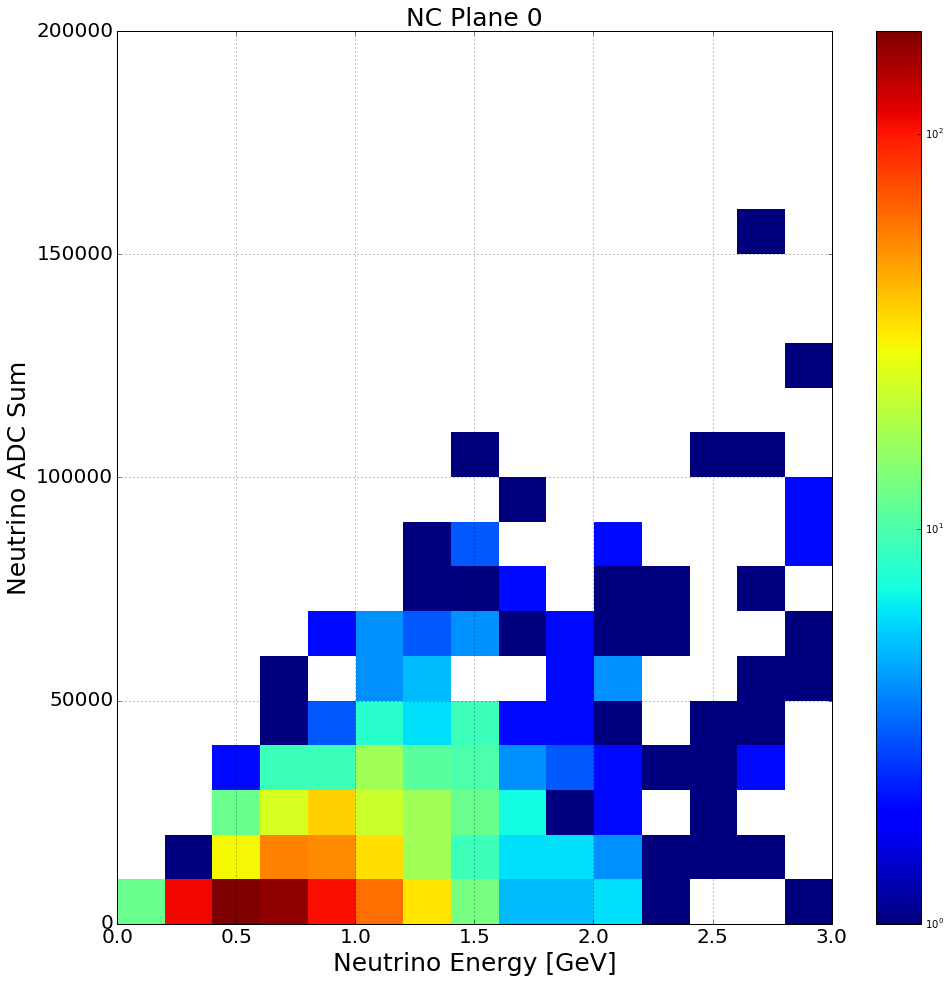

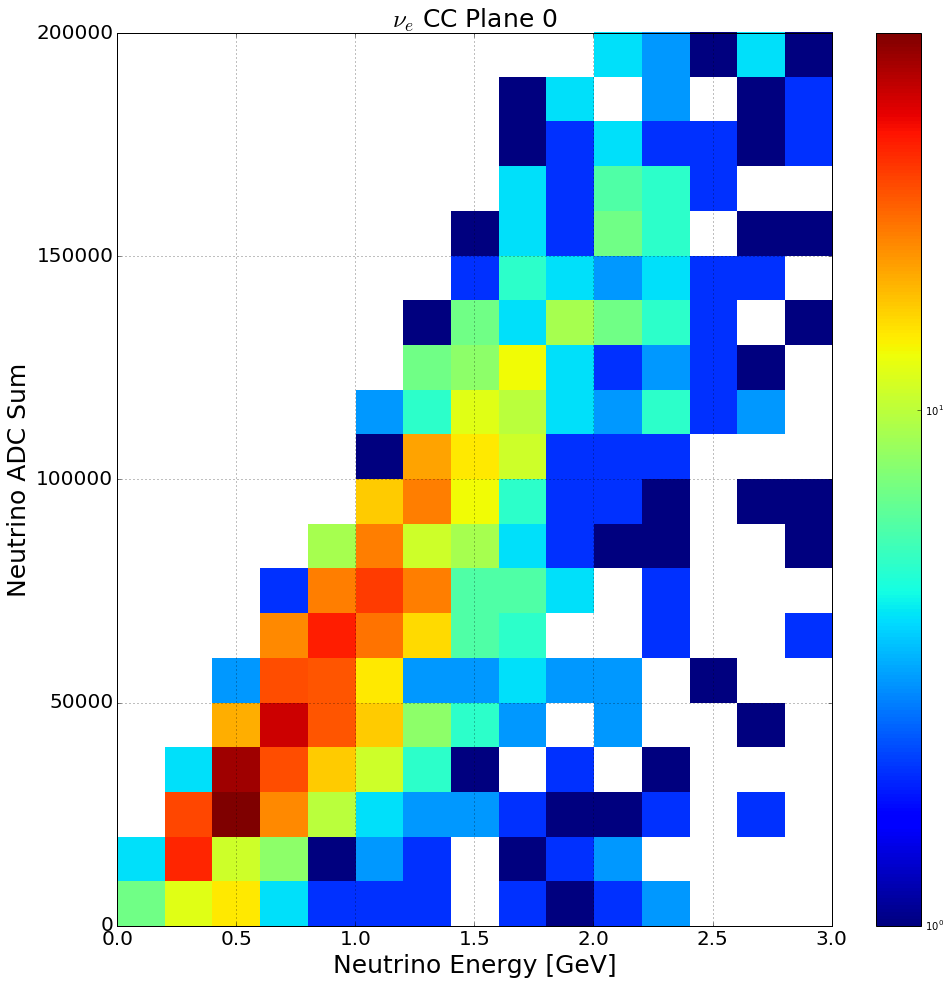

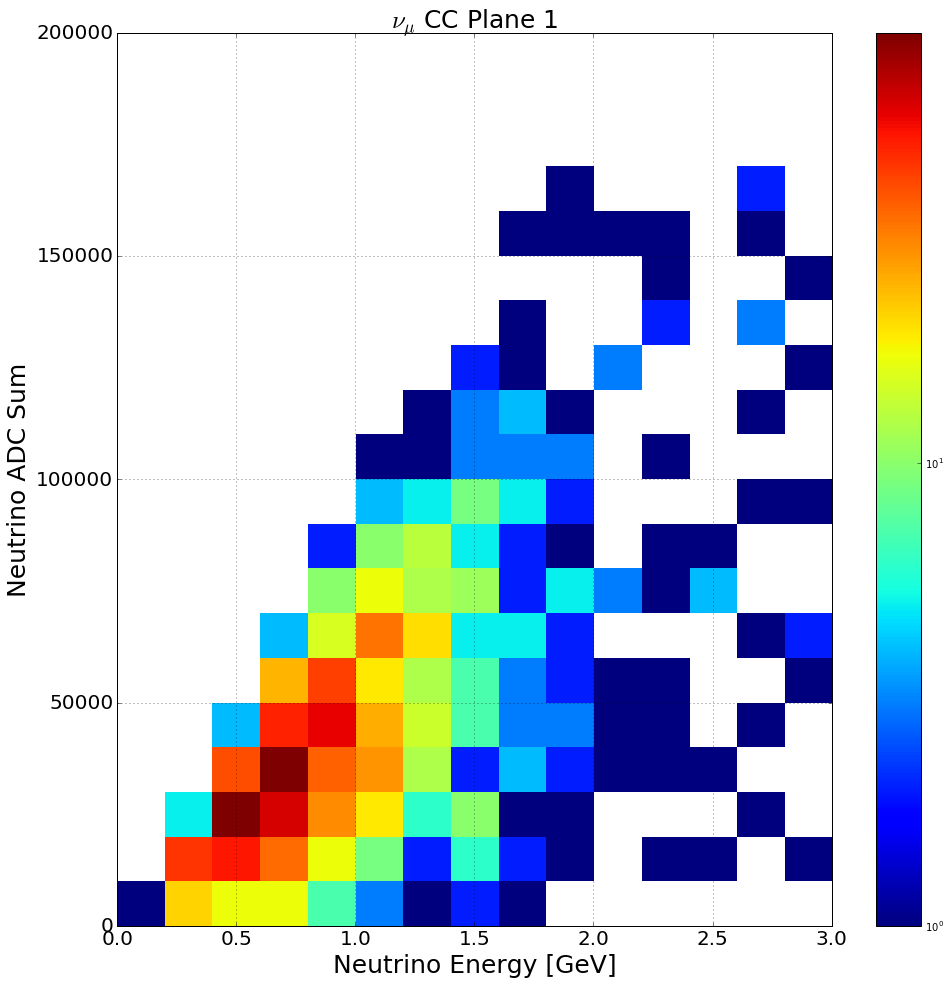

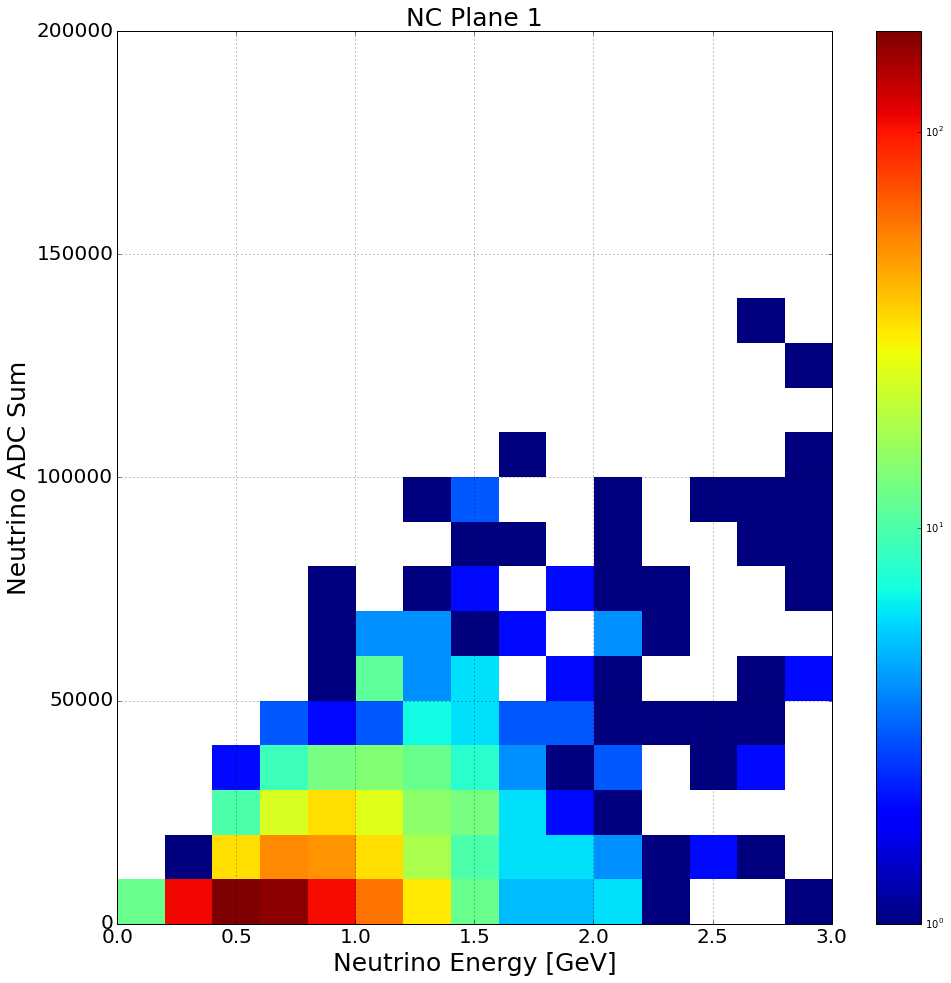

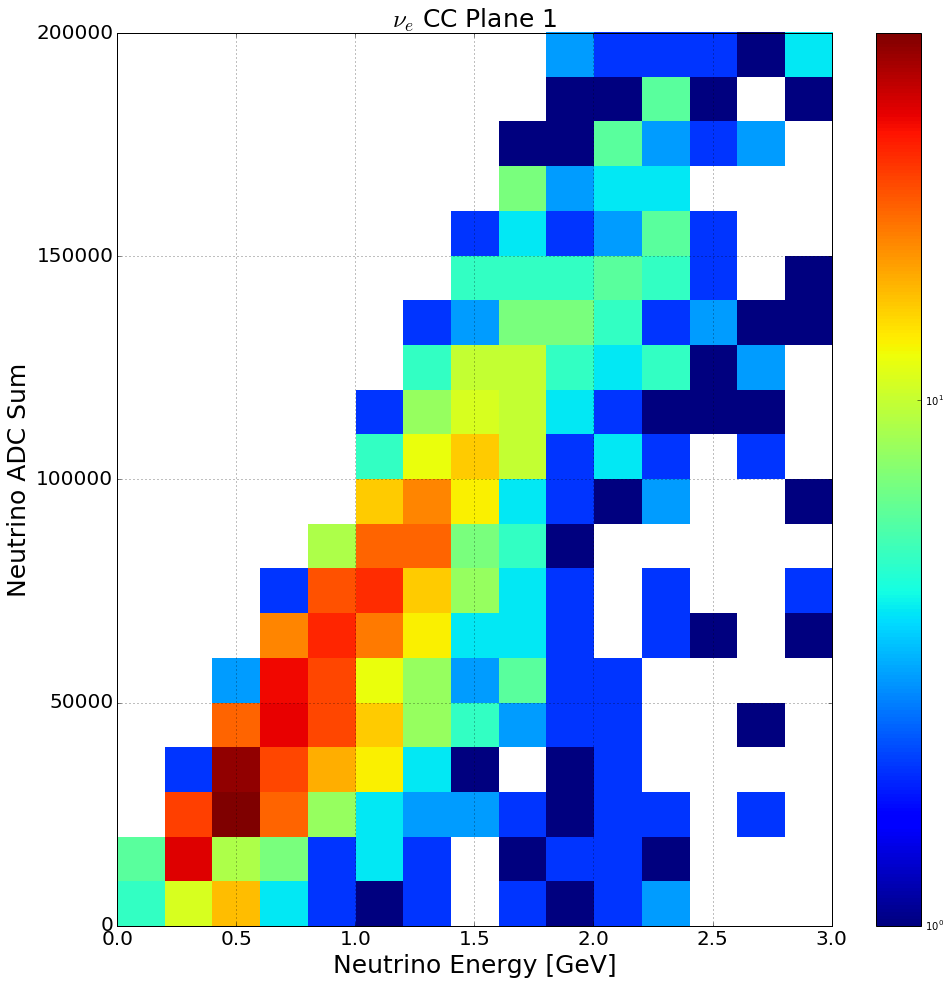

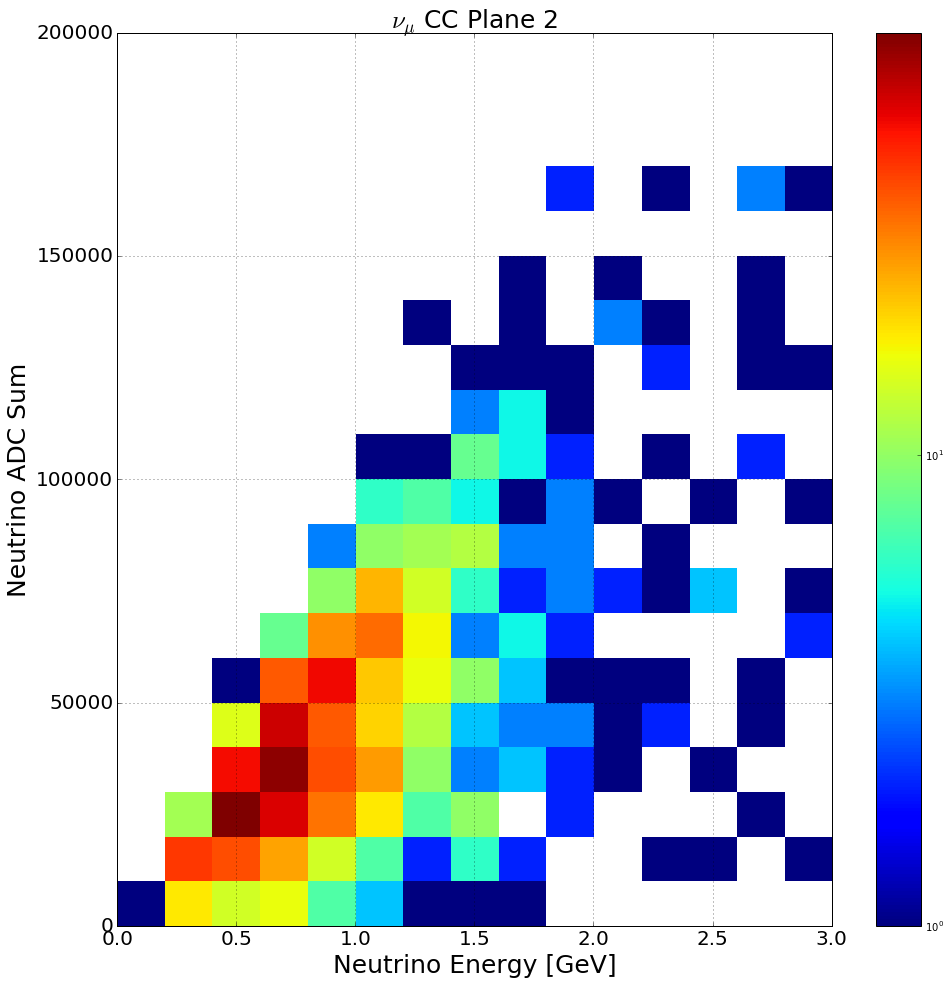

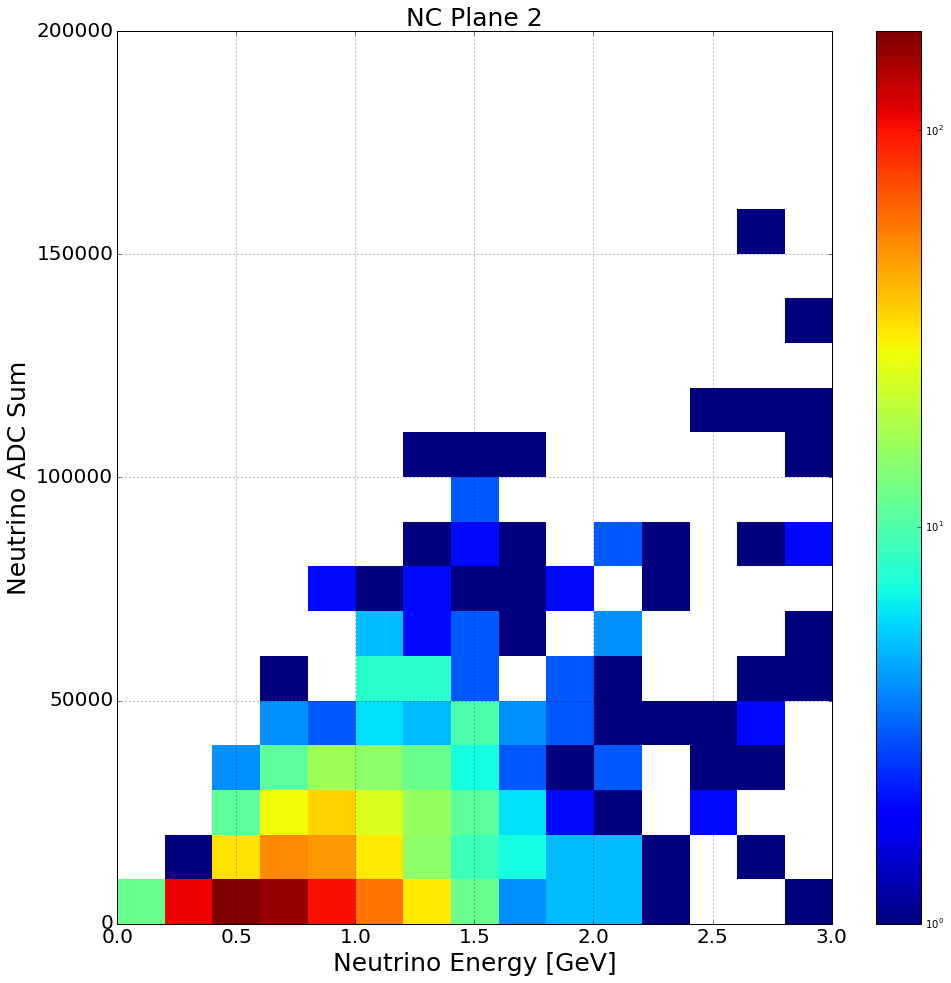

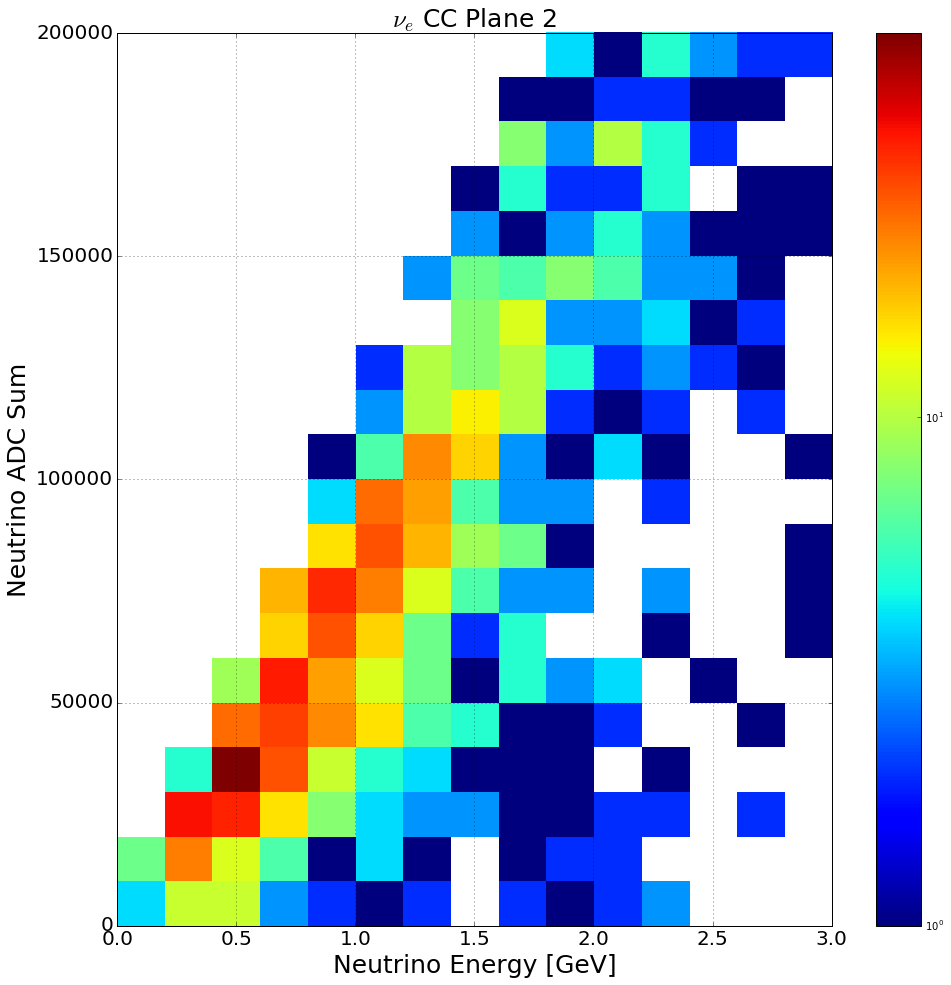

In [9]:
from matplotlib.colors import LogNorm
adc_dep_bin_step = 10000.0
adc_dep_end_bin = 200000.0
adc_dep_bins = numpy.arange(0,adc_dep_end_bin + 0.1,adc_dep_bin_step)

nu_energy_bin_step = 0.200
nu_energy_end_bin = 3.0
nu_energy_bins = numpy.arange(0,nu_energy_end_bin + 0.1,nu_energy_bin_step)

for plane in [0,1,2]:
    for name in data_arrs.keys():
        figure = plt.figure(figsize=(16,16))
        if name =='cosmics': continue

        neutrino_energy = data_arrs[name][0:nentries]['energy']
        dep_e_adc = data_arrs[name][0:nentries]['n_sum_{0}'.format(plane)]

        
        plt.hist2d(neutrino_energy, dep_e_adc,
                   bins=[nu_energy_bins,
                         adc_dep_bins],
                   norm=LogNorm(),
#                    normed=True,
                  )
        
        plt.title(labels[name] + " Plane {0}".format(plane),fontsize=25)
        plt.xlabel("Neutrino Energy [GeV]", fontsize=25)
        plt.ylabel("Neutrino ADC Sum", fontsize=25)
        plt.legend(fontsize=25)
        for tick in plt.gca().xaxis.get_major_ticks():
            tick.label.set_size(20)
        for tick in plt.gca().yaxis.get_major_ticks():
            tick.label.set_size(20)
    

        plt.grid(True)
        plt.colorbar()
        plt.show()
    
    

Plot the accuracy for each category as a function of neutrino energy and deposited ADC, in each plane:

In [143]:
def plot_accuracy(_data_arr, plane):
    eff_bin_step = 0.05
    eff_end_bin = 1.0
    eff_bins = numpy.arange(0,eff_end_bin + 0.1,eff_bin_step)
    eff_bin_centers = 0.5*(eff_bins[1:] + eff_bins[:-1])


    nu_energy_bin_step = 0.200
    nu_energy_end_bin = 3.0
    nu_energy_bins = numpy.arange(0,nu_energy_end_bin + 0.1,nu_energy_bin_step)
    nu_energy_bin_centers = 0.5*(nu_energy_bins[1:] + nu_energy_bins[:-1])



    eng_bin_values  = {}
    eng_bin_std     = {}

    for name in _data_arr.keys():
        if name =='cosmics': continue

        eng_bin_values  .update( { name : [] })
        eng_bin_std     .update( { name : [] })

        accuracies = []
        energies   = []
        for i in range(len(nu_energy_bins) - 1):
            bin_start  = nu_energy_bins[i]
            bin_end    = nu_energy_bins[i+1]
            mask_left  = _data_arr[name][0:nentries]['energy'] > bin_start
            mask_right = _data_arr[name][0:nentries]['energy'] < bin_end

            mask = reduce(numpy.logical_and, [mask_left,mask_right])

            if numpy.count_nonzero(mask) == 0:
                eng_bin_values[name].append(0.0)
                eng_bin_std[name].append(0.0)
            else:
                acc = _data_arr[name][0:nentries]['n_acc_{0}'.format(plane)][mask]
                eng_bin_values[name].append(numpy.mean(acc))
                eng_bin_std[name].append(numpy.std(acc))
                for val in acc:
                    if val == 1.0:
                        accuracies.append(0.999)
                    else:
                        accuracies.append(val)
                    energies.append(nu_energy_bin_centers[i])


        figure = plt.figure(figsize=(16,9))
        plt.hist2d(energies, accuracies, bins=[nu_energy_bins, eff_bins],
#                    cmap='gist_rainbow_r', 
                   cmin=0.01)
        plt.colorbar()
        plt.grid(True)
        plt.ylim(0,1.0)
        plt.title(labels[name] + " Plane {0}".format(plane),fontsize=25)
        plt.xlabel("Neutrino Energy [GeV]", fontsize=25)
        plt.ylabel("Tagging Accuracy", fontsize=25)
        for tick in plt.gca().xaxis.get_major_ticks():
            tick.label.set_size(20)
        for tick in plt.gca().yaxis.get_major_ticks():
            tick.label.set_size(20)
        plt.show()


    # Plot the efficiencies for tagging neutrinos as a function of neutrino energy:
    figure = plt.figure(figsize=(16,9))
    for name in _data_arr.keys():
        if name == 'cosmics': continue
        plt.plot(nu_energy_bin_centers, eng_bin_values[name],
#                      yerr=eng_bin_std[name],
                     lw=2,
                     label=labels[name])
    plt.legend(fontsize=25,loc=4)
    plt.grid(True)
    plt.title("Plane {0}".format(plane),fontsize=25)
    plt.ylim(0,1.0)
    plt.xlabel("Neutrino Energy [GeV]", fontsize=25)
    plt.ylabel("Tagging Accuracy", fontsize=25)
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_size(20)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_size(20)
    plt.show()


def plot_iou(_data_arr, plane):
    eff_bin_step = 0.05
    eff_end_bin = 1.0
    eff_bins = numpy.arange(0,eff_end_bin + 0.1,eff_bin_step)
    eff_bin_centers = 0.5*(eff_bins[1:] + eff_bins[:-1])


    nu_energy_bin_step = 0.200
    nu_energy_end_bin = 3.0
    nu_energy_bins = numpy.arange(0,nu_energy_end_bin + 0.1,nu_energy_bin_step)
    nu_energy_bin_centers = 0.5*(nu_energy_bins[1:] + nu_energy_bins[:-1])



    eng_bin_values  = {}
    eng_bin_std     = {}

    for name in _data_arr.keys():
        if name =='cosmics': continue

        eng_bin_values  .update( { name : [] })
        eng_bin_std     .update( { name : [] })

        accuracies = []
        energies   = []
        for i in range(len(nu_energy_bins) - 1):
            bin_start  = nu_energy_bins[i]
            bin_end    = nu_energy_bins[i+1]
            mask_left  = _data_arr[name][0:nentries]['energy'] > bin_start
            mask_right = _data_arr[name][0:nentries]['energy'] < bin_end

            mask = reduce(numpy.logical_and, [mask_left,mask_right])

            if numpy.count_nonzero(mask) == 0:
                eng_bin_values[name].append(0.0)
                eng_bin_std[name].append(0.0)
            else:
                acc = _data_arr[name][0:nentries]['n_iou_{0}'.format(plane)][mask]
                eng_bin_values[name].append(numpy.mean(acc))
                eng_bin_std[name].append(numpy.std(acc))
                for val in acc:
                    if val == 1.0:
                        accuracies.append(0.999)
                    else:
                        accuracies.append(val)
                    energies.append(nu_energy_bin_centers[i])


        figure = plt.figure(figsize=(16,9))
        plt.hist2d(energies, accuracies, bins=[nu_energy_bins, eff_bins],
#                    cmap='gist_rainbow_r', 
                   cmin=0.01)
        plt.colorbar()
        plt.grid(True)
        plt.ylim(0,1.0)
        plt.title(labels[name] + " Plane {0}".format(plane),fontsize=25)
        plt.xlabel("Neutrino Energy [GeV]", fontsize=25)
        plt.ylabel("Tagging IoU", fontsize=25)
        for tick in plt.gca().xaxis.get_major_ticks():
            tick.label.set_size(20)
        for tick in plt.gca().yaxis.get_major_ticks():
            tick.label.set_size(20)
        plt.show()


    # Plot the efficiencies for tagging neutrinos as a function of neutrino energy:
    figure = plt.figure(figsize=(16,9))
    for name in _data_arr.keys():
        if name == 'cosmics': continue
        plt.plot(nu_energy_bin_centers, eng_bin_values[name],
#                      yerr=eng_bin_std[name],
                     lw=2,
                     label=labels[name])
    plt.legend(fontsize=25,loc=4)
    plt.grid(True)
    plt.title("Plane {0}".format(plane),fontsize=25)
    plt.ylim(0,1.0)
    plt.xlabel("Neutrino Energy [GeV]", fontsize=25)
    plt.ylabel("Tagging IoU", fontsize=25)
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_size(20)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_size(20)
    plt.show()


    

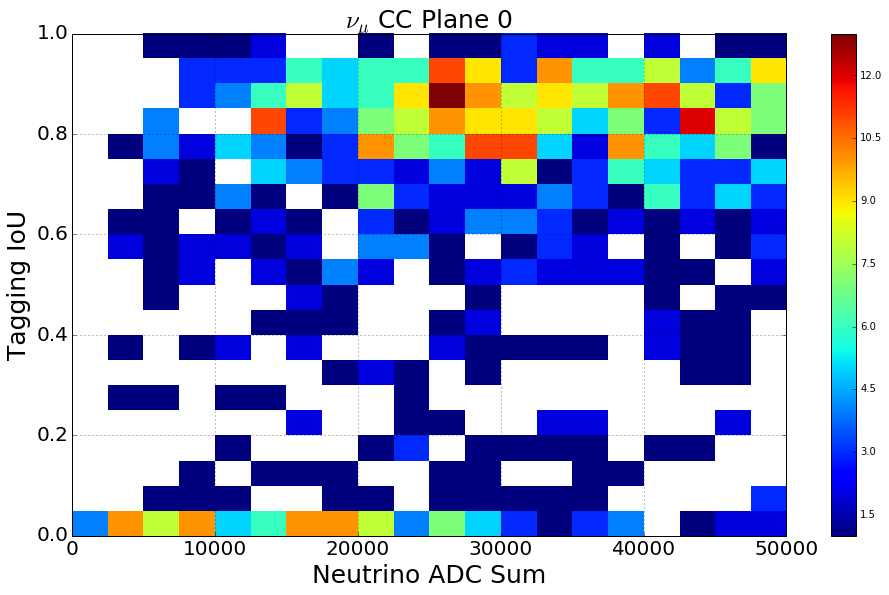

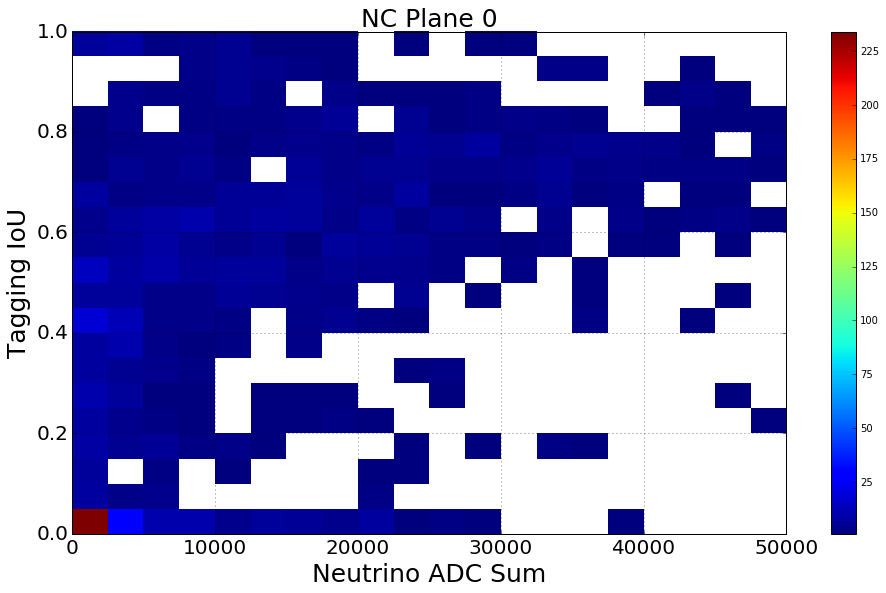

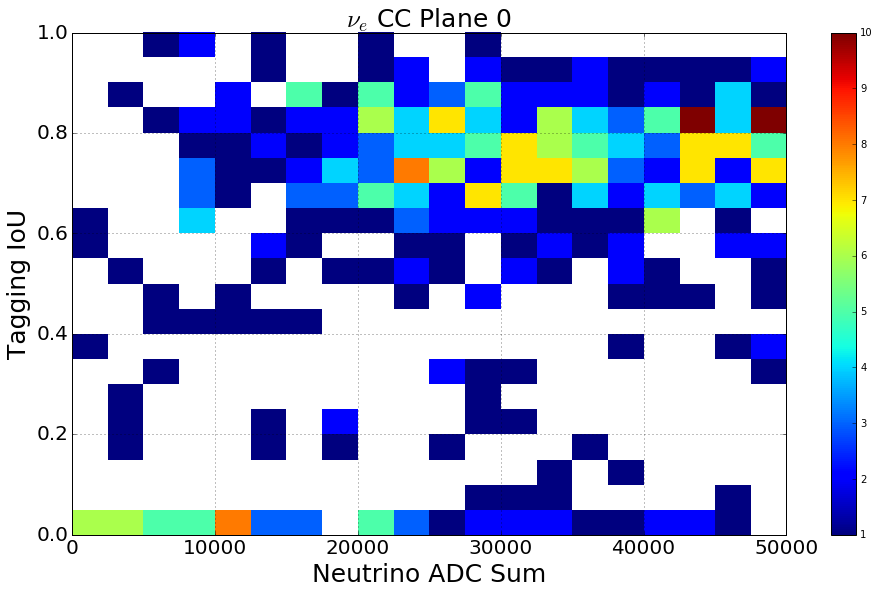

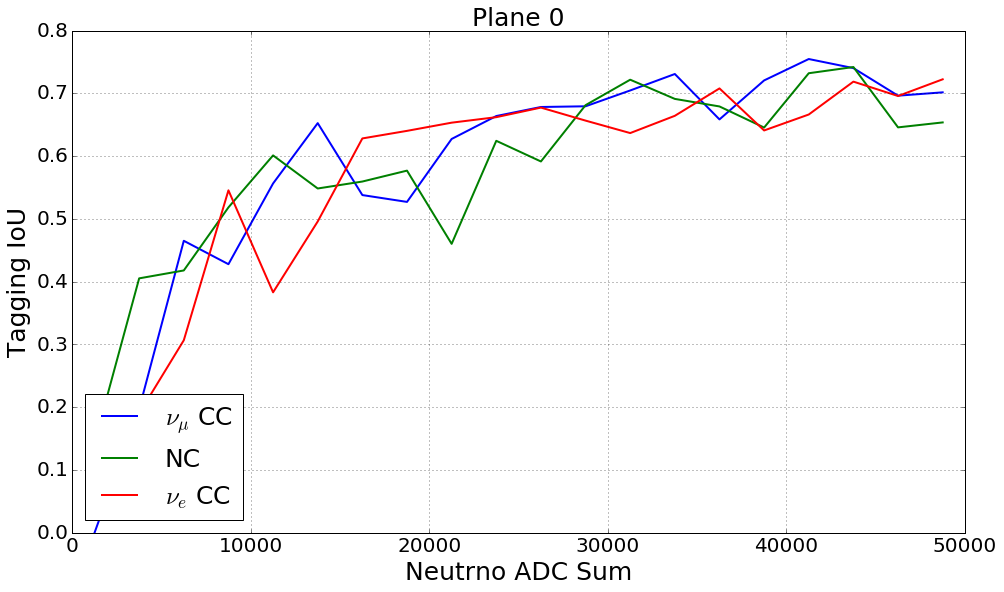

In [11]:
eff_bin_step = 0.05
eff_end_bin = 1.0
eff_bins = numpy.arange(0,eff_end_bin + 0.1,eff_bin_step)
eff_bin_centers = 0.5*(eff_bins[1:] + eff_bins[:-1])

adc_dep_bin_step = 2500.0
adc_dep_end_bin = 50000.0
adc_dep_bins = numpy.arange(0,adc_dep_end_bin + 0.1,adc_dep_bin_step)
adc_dep_bin_centers = 0.5*(adc_dep_bins[1:] + adc_dep_bins[:-1])

for plane in [0]:
    
    adc_dep_bin_values  = {}
    adc_dep_bin_std     = {}
    
    for name in data_arrs.keys():
        if name =='cosmics': continue

        adc_dep_bin_values  .update( { name : [] })
        adc_dep_bin_std     .update( { name : [] })
        
        accuracies = []
        energies   = []
        for i in range(len(adc_dep_bins) - 1):
            bin_start  = adc_dep_bins[i]
            bin_end    = adc_dep_bins[i+1]
            mask_left  = data_arrs[name][0:nentries]['n_sum_{0}'.format(plane)] > bin_start
            mask_right = data_arrs[name][0:nentries]['n_sum_{0}'.format(plane)] < bin_end
            
            mask = reduce(numpy.logical_and, [mask_left,mask_right])
                        
            if numpy.count_nonzero(mask) == 0:
                adc_dep_bin_values[name].append(0.0)
                adc_dep_bin_std[name].append(0.0)
            else:
                acc = data_arrs[name][0:nentries]['n_iou_{0}'.format(plane)][mask]
                adc_dep_bin_values[name].append(numpy.mean(acc))
                adc_dep_bin_std[name].append(1./numpy.sqrt(len(acc)))
                for val in acc:
                    if val == 1.0:
                        accuracies.append(0.999)
                    else:
                        accuracies.append(val)
                    energies.append(adc_dep_bin_centers[i])
    
    
        figure = plt.figure(figsize=(16,9))
        plt.hist2d(energies, accuracies, bins=[adc_dep_bins, eff_bins], 
#                    cmap='gist_rainbow_r', 
                   cmin=0.01)
        plt.colorbar()
        plt.grid(True)
        plt.ylim(0,1.0)
        plt.title(labels[name] + " Plane {0}".format(plane),fontsize=25)
        plt.xlabel("Neutrino ADC Sum", fontsize=25)
        plt.ylabel("Tagging IoU", fontsize=25)
        for tick in plt.gca().xaxis.get_major_ticks():
            tick.label.set_size(20)
        for tick in plt.gca().yaxis.get_major_ticks():
            tick.label.set_size(20)
        plt.show()


    # Plot the efficiencies for tagging neutrinos as a function of neutrino energy:
    figure = plt.figure(figsize=(16,9))
    for name in data_arrs.keys():
        if name == 'cosmics': continue
        plt.plot(adc_dep_bin_centers, adc_dep_bin_values[name],
#                      yerr=adc_dep_bin_std[name],
                     lw=2,
                     label=labels[name])
    plt.legend(fontsize=25.,loc=3)
    plt.grid(True)
    plt.title("Plane {0}".format(plane),fontsize=25)
    plt.xlabel("Neutrno ADC Sum", fontsize=25)
    plt.ylabel("Tagging IoU", fontsize=25)
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_size(20)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_size(20)
    plt.show()


    

# Applying some basic cuts

In principle, a threshold on the number of neutrino pixels can reject cosmic events. There are two cuts I'll try applying quickly: thresholding on the number of neutrino pixels per plane, and time matching of neutrino pixels across planes.

### Time matching

Let's quickly plot the y time coordinate matching across planes

In [20]:
def plot_time_matching(_data_arr, planeA, planeB, use_only_names=["nueCC", "numuCC", "NC"]):
    time_bin_step = 10.0
    time_end_bin = 320.0
    time_bins = numpy.arange(0,time_end_bin + 0.1,time_bin_step)
    time_bin_centers = 0.5*(time_bins[1:] + time_bins[:-1])

    planeA_time_values = []
    planeB_time_values = []

    for name in data_arrs.keys():
        if name not in use_only_names: continue

        planeA_time_values = data_arrs[name][0:nentries]['n_pix_y_{0}'.format(planeA)]
        planeB_time_values = data_arrs[name][0:nentries]['n_pix_y_{0}'.format(planeB)]    


        figure = plt.figure(figsize=(16,9))
        plt.hist2d(planeA_time_values, planeB_time_values, bins=[time_bins, time_bins], 
    #                    cmap='gist_rainbow_r', 
                   cmin=0.01)
        plt.colorbar()
        plt.grid(True)
    #     plt.ylim(0,1.0)
        plt.title(labels[name] + " Time Matching".format(planeA),fontsize=25)
        plt.xlabel("Plane {0}".format(planeA), fontsize=25)
        plt.ylabel("Plane {0}".format(planeB), fontsize=25)
        for tick in plt.gca().xaxis.get_major_ticks():
            tick.label.set_size(20)
        for tick in plt.gca().yaxis.get_major_ticks():
            tick.label.set_size(20)
        plt.show()



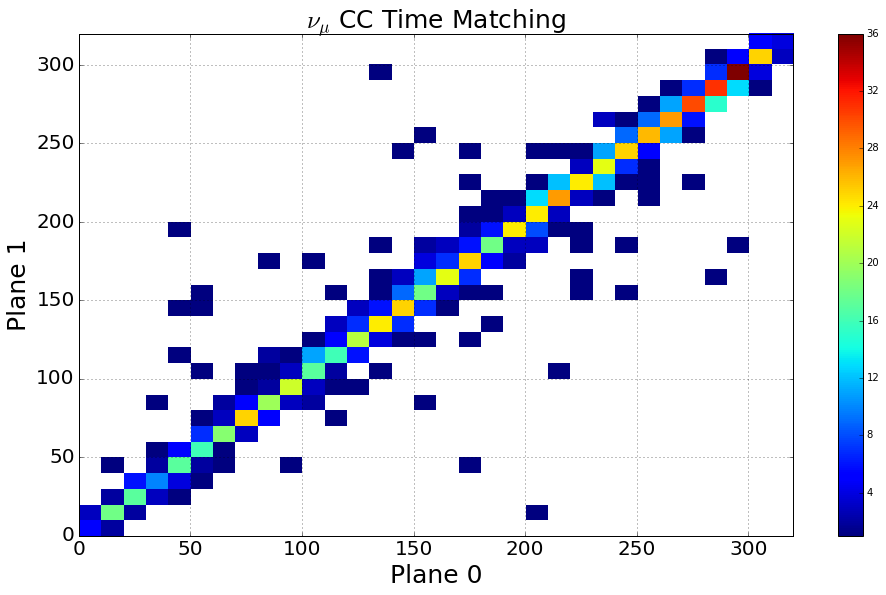

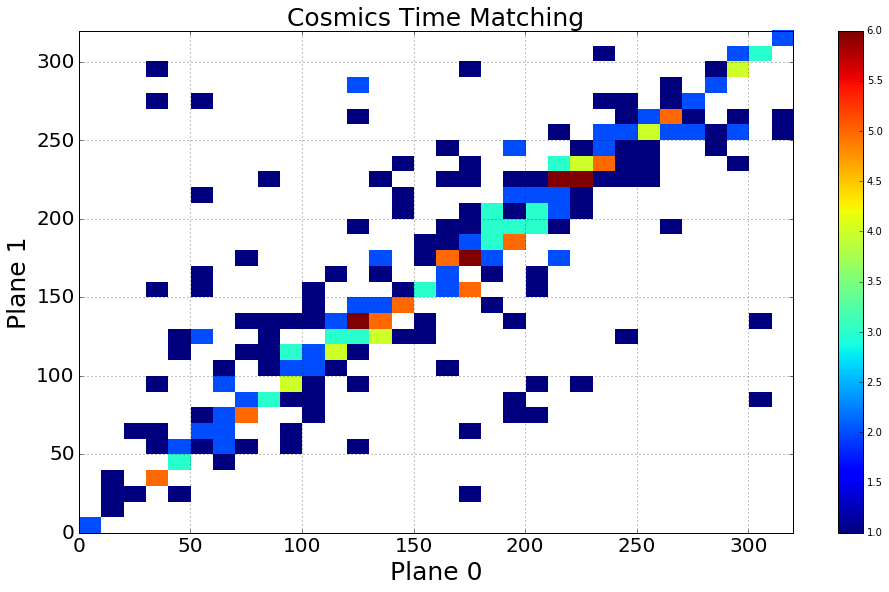

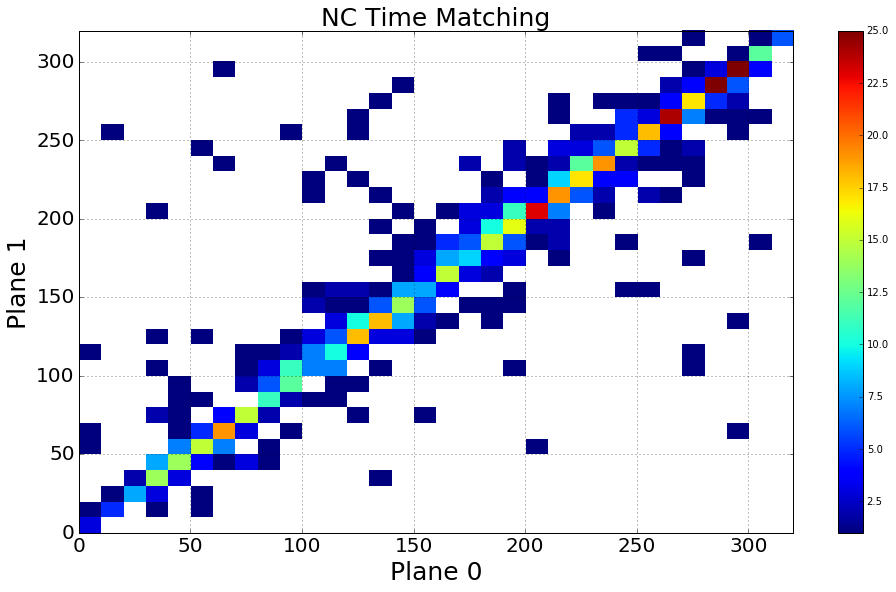

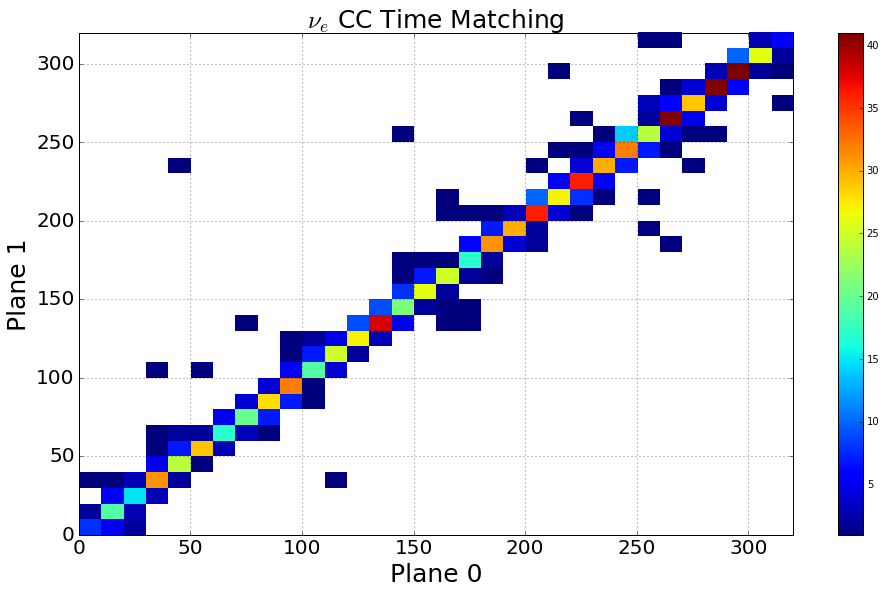

In [21]:
plot_time_matching(data_arrs, 0,1, use_only_names=['nueCC', 'numuCC', 'NC', 'cosmics'])

Let's make some variables for the matching across planes, defined as:
- abs(timeA - timeB) / max(stdA, stdB)

In [163]:
def cut_mask(_data_arr):
    plane0_y = _data_arr[:]['n_pix_y_0']
    plane1_y = _data_arr[:]['n_pix_y_1']
    plane2_y = _data_arr[:]['n_pix_y_2']
    plane0_sigy = _data_arr[:]['n_pix_sigy_0']
    plane1_sigy = _data_arr[:]['n_pix_sigy_1']
    plane2_sigy = _data_arr[:]['n_pix_sigy_2']
    
    time01 = numpy.abs(plane0_y - plane1_y) / numpy.maximum(0.1, plane0_sigy, plane1_sigy)
    time02 = numpy.abs(plane0_y - plane2_y) / numpy.maximum(0.1, plane0_sigy, plane2_sigy)
    time12 = numpy.abs(plane2_y - plane1_y) / numpy.maximum(0.1, plane2_sigy, plane1_sigy)

    cuts = []
    time_match = 1.0
    cuts.append(time01 < time_match)
    cuts.append(time02 < time_match)
    cuts.append(time12 < time_match)
    cuts.append(_data_arr[:]['n_pix_pred_0'] > 5)
    cuts.append(_data_arr[:]['n_pix_pred_1'] > 5)
    cuts.append(_data_arr[:]['n_pix_pred_2'] > 5)
    
    
    full_cuts = reduce(numpy.logical_and, cuts)
    return full_cuts
    
#     bins_time = numpy.arange(0,10,1.0)
#     bins_iou  = numpy.arange(0,1.0, 0.05)
# #     plt.hist(time02, bins=bins_time)
#     plt.hist2d(time01, _data_arr[:]['n_iou_2'], bins=[bins_time, bins_iou],cmin=0.01)
#     plt.grid(True)
#     plt.show()
#     plt.hist2d(time02, _data_arr[:]['n_iou_2'], bins=[bins_time, bins_iou],cmin=0.01)
#     plt.grid(True)
#     plt.show()
#     plt.hist2d(time12, _data_arr[:]['n_iou_2'], bins=[bins_time, bins_iou],cmin=0.01)
#     plt.grid(True)
#     plt.show()

    




In [164]:
print "Nue Efficiency: {0:.2}".format(numpy.average(cut_mask(data_arrs['nueCC'])))
print "numuCC Efficiency: {0:.2}".format(numpy.average(cut_mask(data_arrs['numuCC'])))
print "NC Efficiency: {0:.2}".format(numpy.average(cut_mask(data_arrs['NC'])))
print "cosmics Efficiency: {0:.2}".format(numpy.average(cut_mask(data_arrs['cosmics'])))
# cut_mask(data_arrs['numuCC'])
# cut_mask(data_arrs['NC'])
# cut_mask(data_arrs['cosmics'])


Nue Efficiency: 0.89
numuCC Efficiency: 0.81
NC Efficiency: 0.5
cosmics Efficiency: 0.057


In [171]:
masked_arrs = {}
masks = {}
for name in data_arrs.keys():
    mask = cut_mask(data_arrs[name])
    masked_arrs.update(
        {
            name : data_arrs[name][:][mask]
        }
    )
    masks.update(
        {
            name : mask
        }
    )


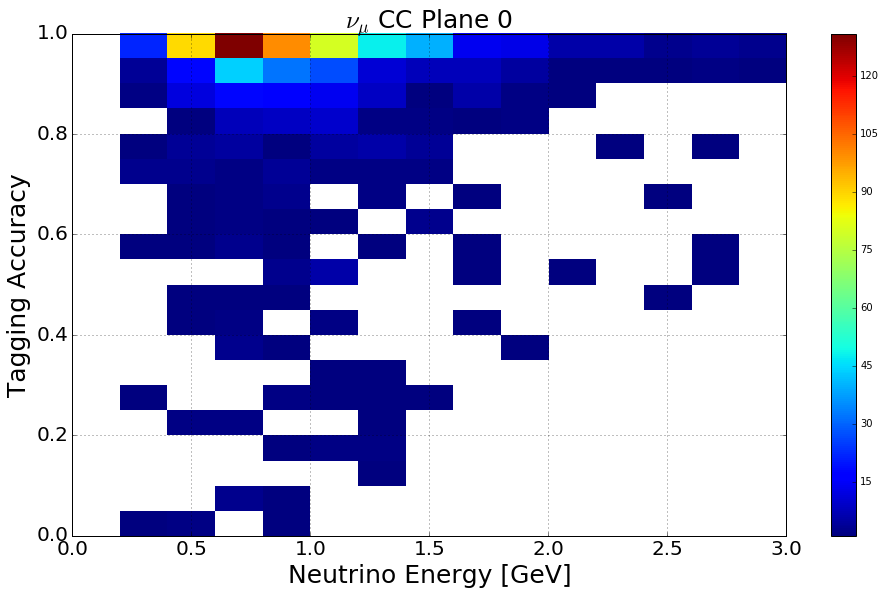

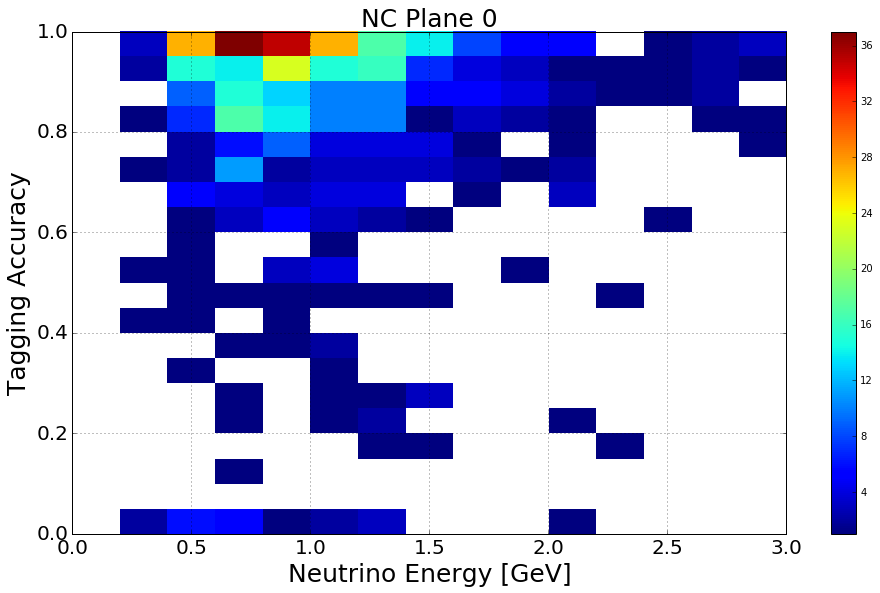

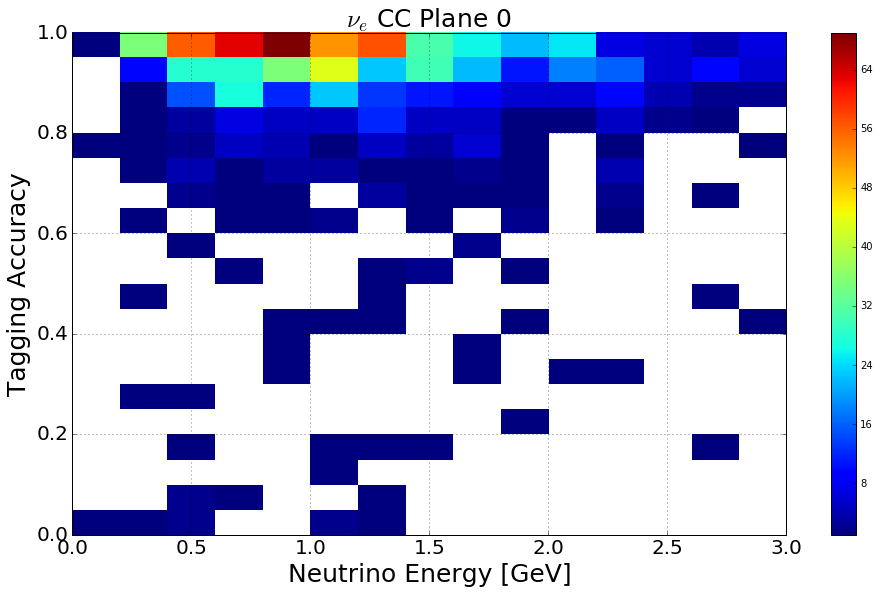

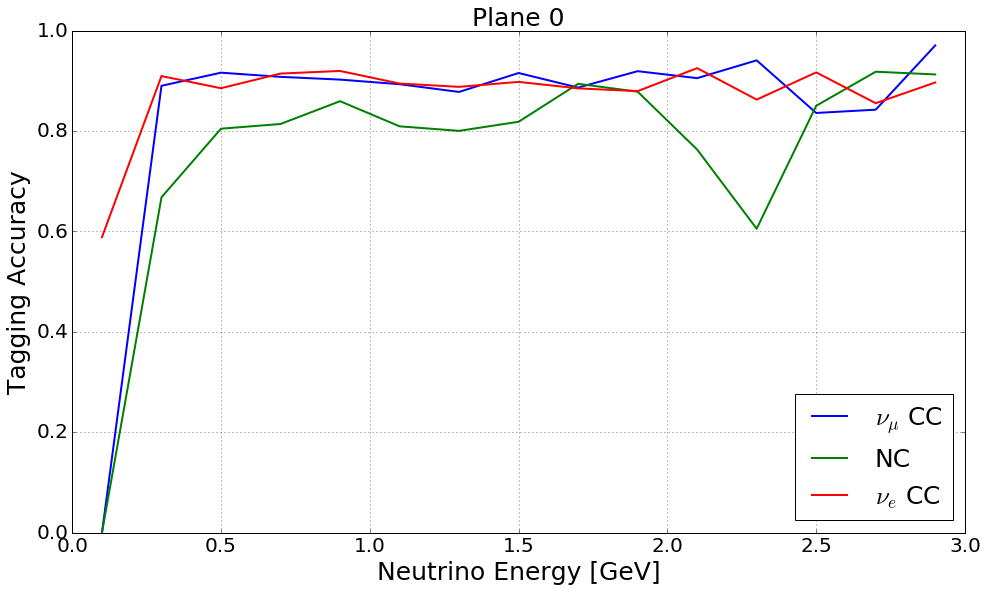

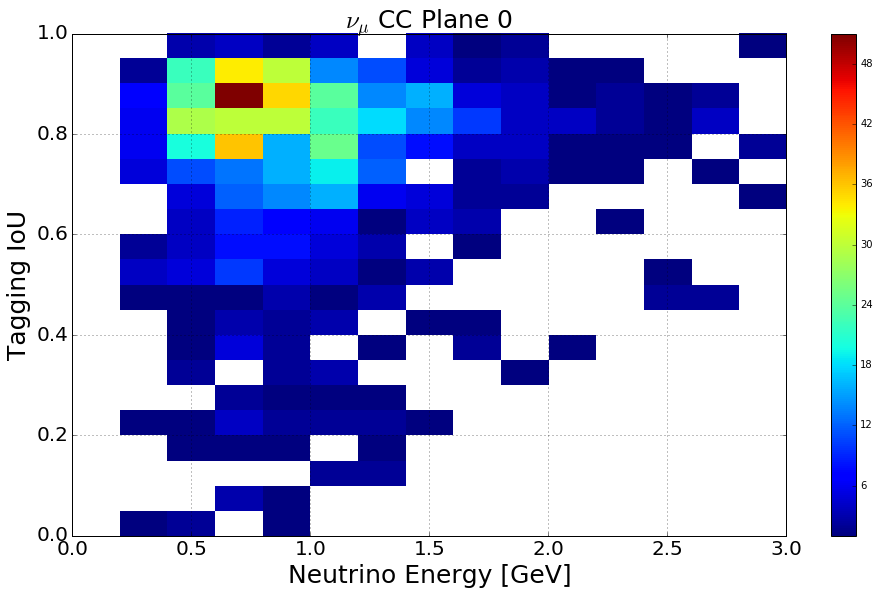

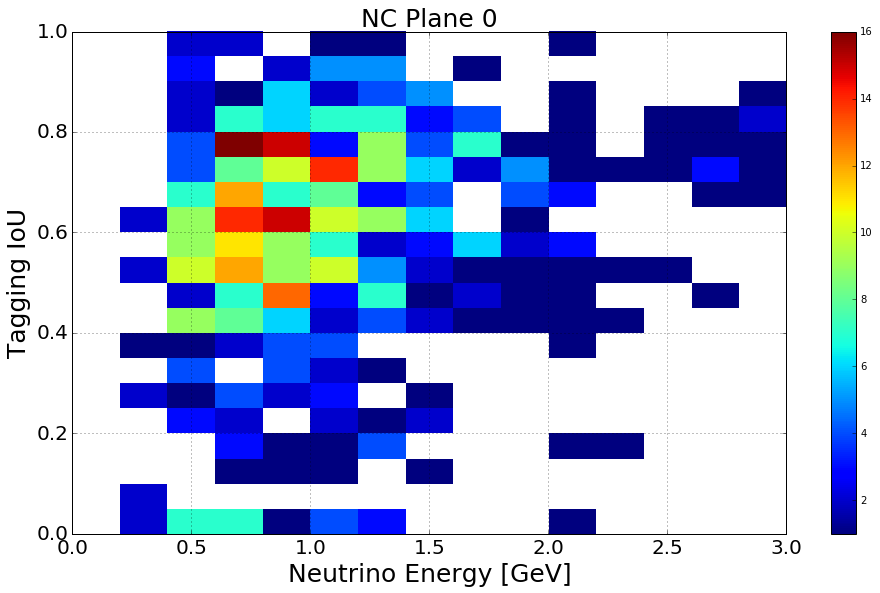

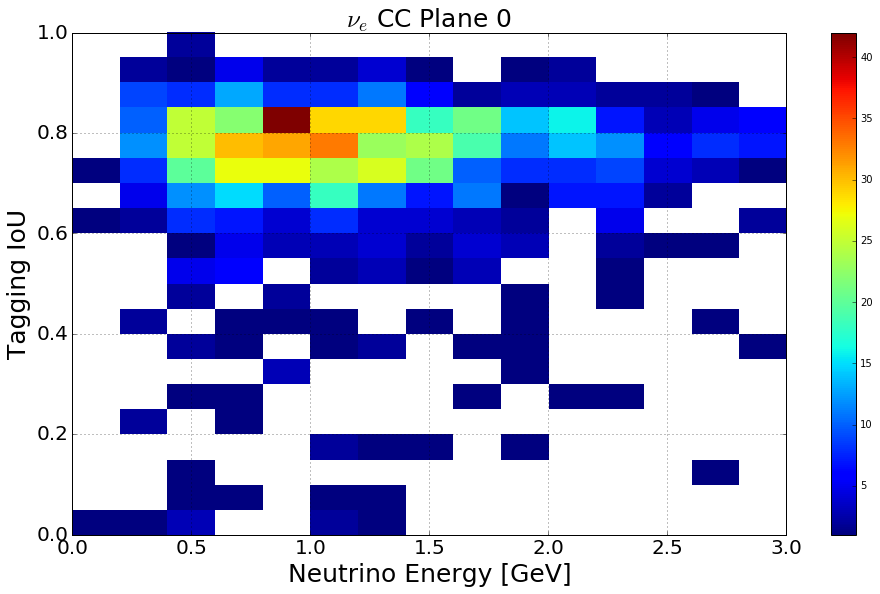

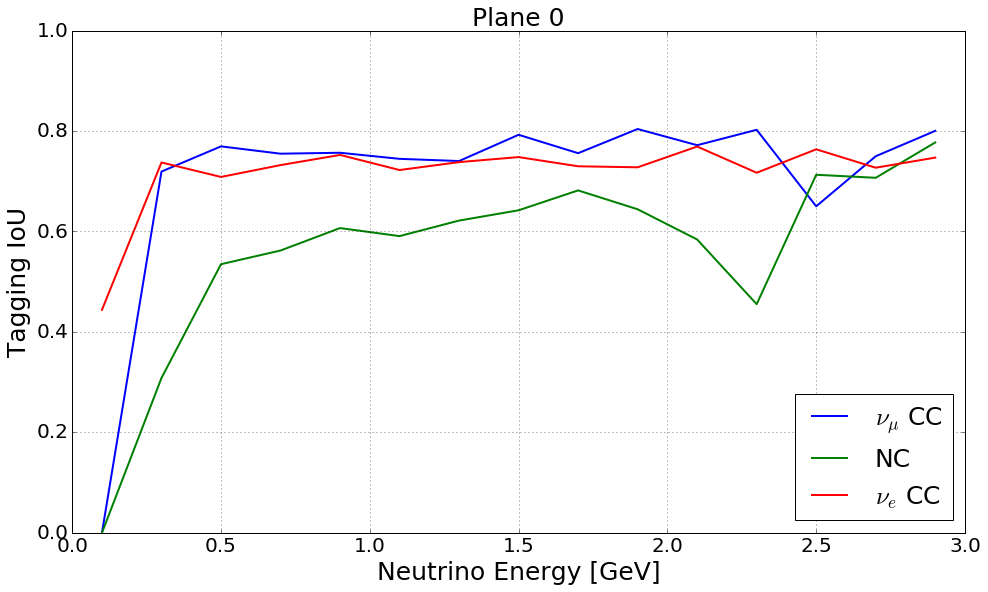

In [168]:
plot_accuracy(masked_arrs, 0)
plot_iou(masked_arrs,0)

Get some events for nue, numu and NC that pass the mask:

In [177]:
nc_passing_indexes = numpy.where(masks['NC'] == True)
print "NC Passing index: "
print nc_passing_indexes[0][5:10]

nue_passing_indexes = numpy.where(masks['nueCC'] == True)
print "nue Passing index: "
print nue_passing_indexes[0][0:5]

numu_passing_indexes = numpy.where(masks['numuCC'] == True)
print "numu Passing index: "
print numu_passing_indexes[0][0:5]

cosmic_passing_indexes = numpy.where(masks['cosmics'] == True)
print "cosmic Passing index: "
print cosmic_passing_indexes[0][0:5]


NC Passing index: 
[ 8  9 13 15 16]
nue Passing index: 
[0 1 6 7 8]
numu Passing index: 
[0 1 2 4 5]
cosmic Passing index: 
[ 55  82 118 134 136]
